In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

In [51]:
df = pd.read_csv('D:\Education\Coding\Machine Learning\Machine Learning Projects\Employee Turnover Prediction\dataset.csv')

In [52]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
df.shape

(14999, 10)

In [54]:
## column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [55]:
df = df.rename(columns={'sales': 'department'})

In [56]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [57]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [58]:
df['department'] = np.where(df.department == 'support', 'technical', df['department'])
df['department'] = np.where(df.department == 'IT', 'technical', df['department'])

In [59]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [60]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [61]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [63]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [64]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,False,True,False,False,True,False


In [65]:
df.drop(['department', 'salary'], inplace=True, axis=1)

In [66]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


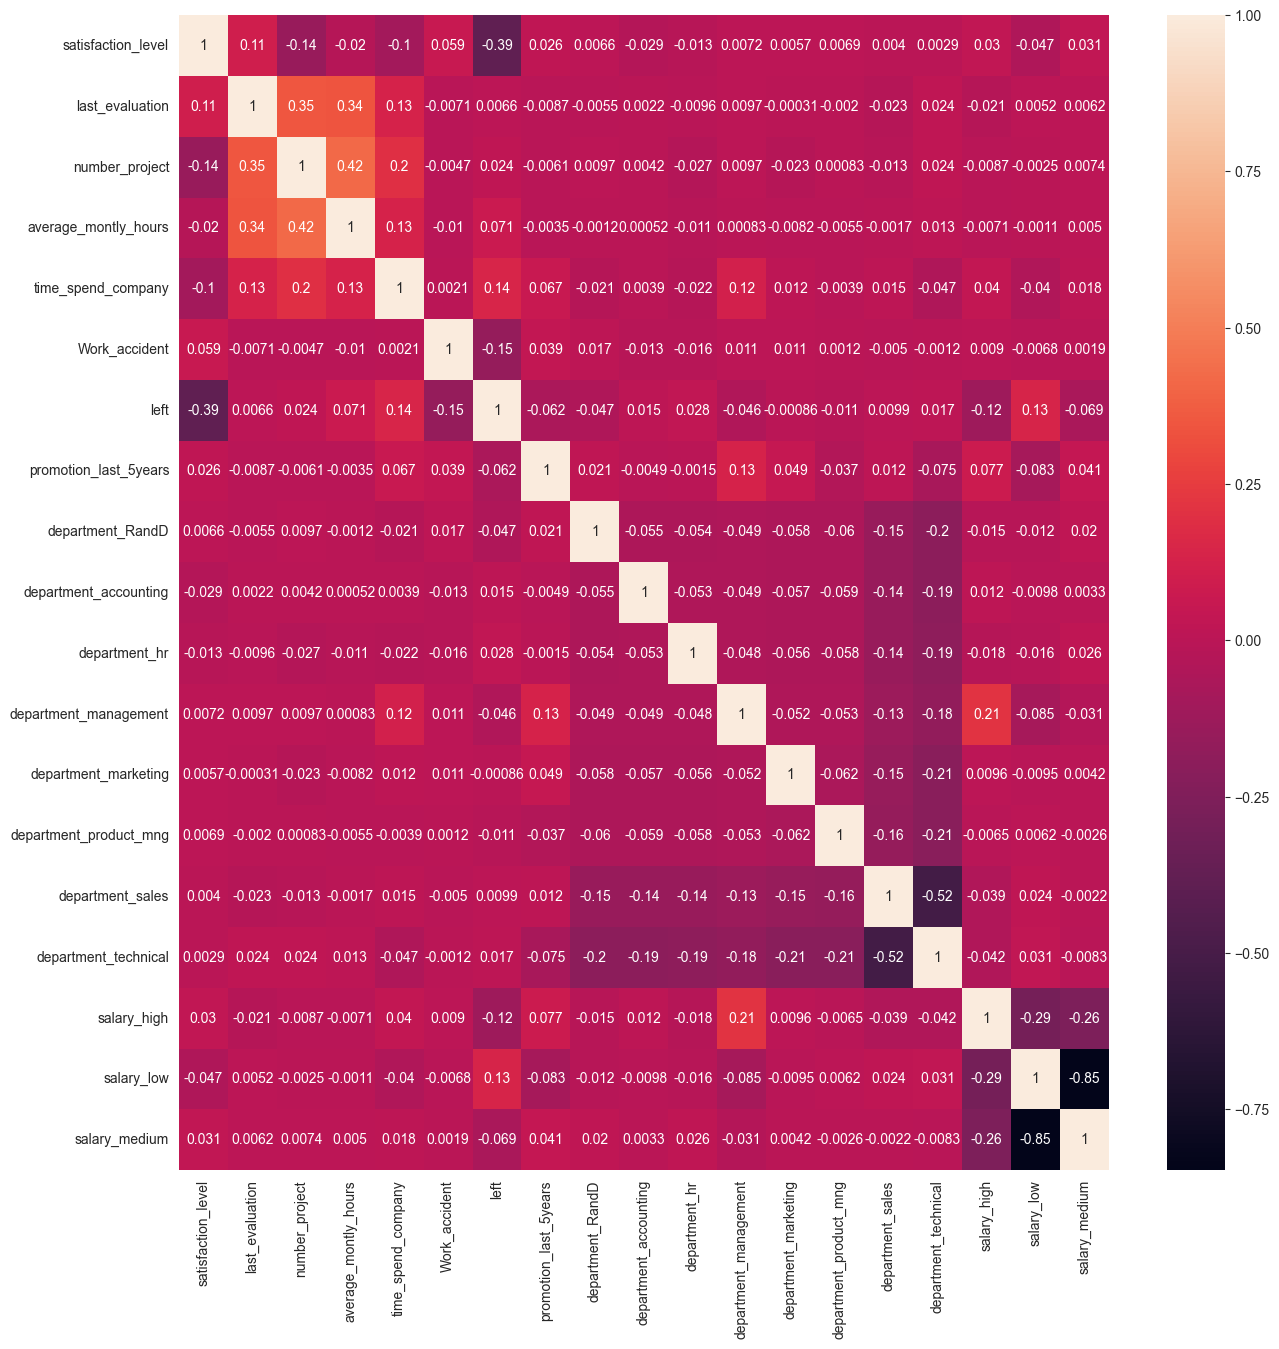

In [67]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

In [68]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [69]:
X = [x for x in df.columns if x != 'left']
y = ['left']

X = df[X]
y = df[y]

In [70]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,True,False,False,True,False


In [71]:
## scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
y_train, y_test = y_train.values, y_test.values

In [74]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11249, 18)
X_test shape:  (3750, 18)
y_train.shape:  (11249, 1)
y_test shape:  (3750, 1)


### Logistic Regression

In [75]:
## selecting top 10 features for training
lg = LogisticRegression()
rf = RFE(estimator=lg, n_features_to_select=10)

## training
rf.fit(X_train, y_train.ravel())

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [76]:
## prediction
pred = rf.predict(X_test)

In [77]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

----------------------------------------------------Accuracy------------------------------------------------------
0.7818666666666667

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.92      0.87      2853
           1       0.58      0.33      0.42       897

    accuracy                           0.78      3750
   macro avg       0.70      0.63      0.64      3750
weighted avg       0.76      0.78      0.76      3750



-------------------------------------------------Confustion Metrics----------------------------------------------------



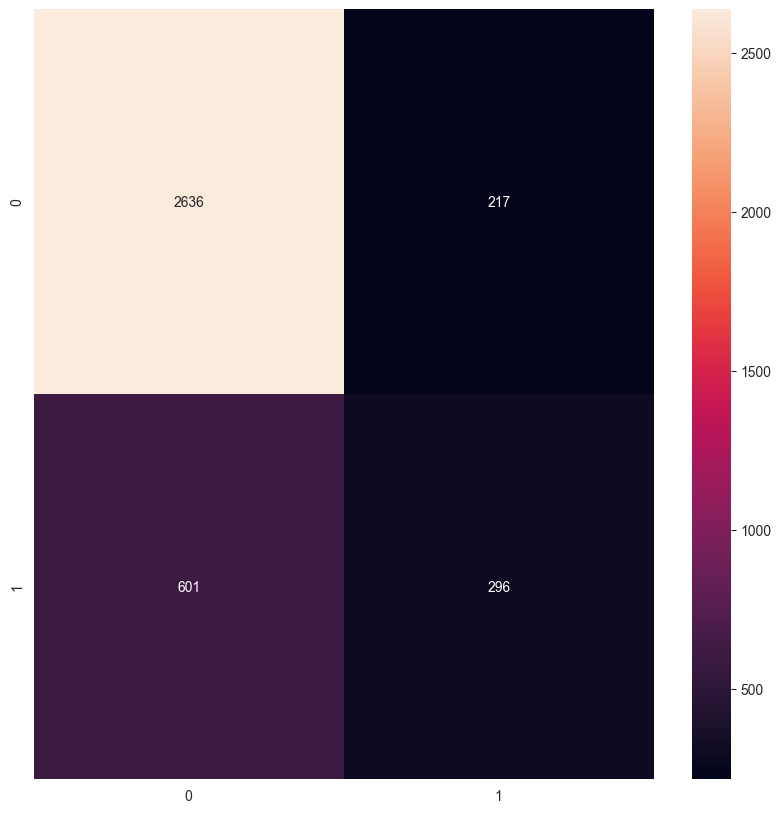

In [78]:

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
print()
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

### random forest classifier

In [79]:
rf = RandomForestClassifier(random_state=42) # Added random_state for reproducibility
rf.fit(X_train, y_train.ravel()) # Ensure the model is fitted with ravel() to avoid DataConversionWarning

RandomForestClassifier(random_state=42)

In [80]:
pred = rf.predict(X_test)

In [81]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))


----------------------------------------------------Accuracy------------------------------------------------------
0.9890666666666666

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2853
           1       0.99      0.96      0.98       897

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



-------------------------------------------------Confustion Metrics----------------------------------------------------



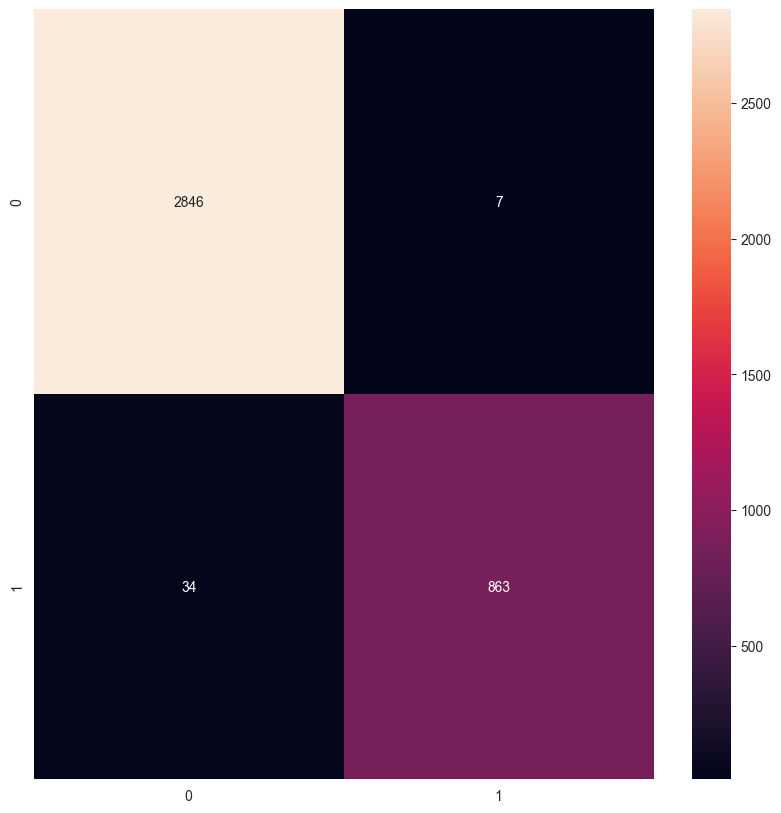

In [82]:
print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
print()
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

In [83]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [84]:
import joblib

# Save the fitted StandardScaler
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']